In [1]:
#APR and EAR

def calculate_apr(periodic_rate, periods_per_year):
    """
    Calculate APR (Annual Percentage Rate).
    
    Parameters:
        periodic_rate (float): Interest rate per period (e.g., monthly rate).
        periods_per_year (int): Number of compounding periods in a year.
    
    Returns:
        float: APR in decimal form.
    """
    apr = periodic_rate * periods_per_year
    return apr

def calculate_ear(apr, periods_per_year):
    """
    Calculate EAR (Effective Annual Rate).
    
    Parameters:
        apr (float): Annual Percentage Rate (in decimal form, e.g., 0.12 for 12%).
        periods_per_year (int): Number of compounding periods per year.
    
    Returns:
        float: EAR in decimal form.
    """
    ear = (1 + (apr / periods_per_year)) ** periods_per_year - 1
    return ear

# Example 1: Credit Card with Monthly Compounding
monthly_rate = 0.015  # 1.5% monthly rate
periods = 12          # Monthly compounding

apr_example = calculate_apr(monthly_rate, periods)
ear_example = calculate_ear(apr_example, periods)

print(f"Example 1 (Credit Card):")
print(f"APR: {apr_example * 100:.2f}%")  # 18.00%
print(f"EAR: {ear_example * 100:.2f}%")  # 19.56% (due to compounding)

# Example 2: Loan with Daily Compounding
daily_rate = 0.0005  # 0.05% daily rate
periods = 365        # Daily compounding

apr_example2 = calculate_apr(daily_rate, periods)
ear_example2 = calculate_ear(apr_example2, periods)

print(f"\nExample 2 (Daily Loan):")
print(f"APR: {apr_example2 * 100:.2f}%")  # 18.25%
print(f"EAR: {ear_example2 * 100:.2f}%")  # 19.72% (higher due to daily compounding)

Example 1 (Credit Card):
APR: 18.00%
EAR: 19.56%

Example 2 (Daily Loan):
APR: 18.25%
EAR: 20.02%


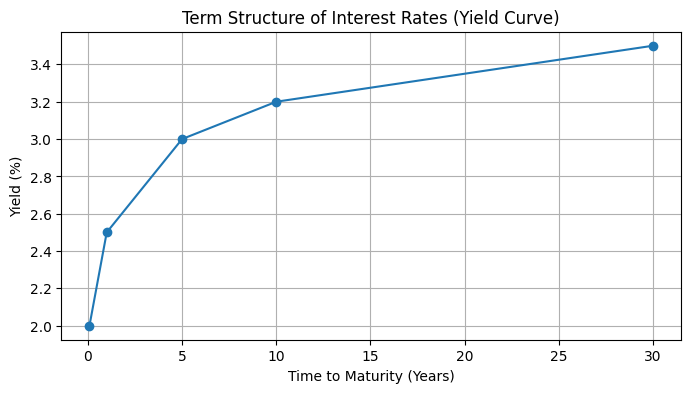

In [2]:
#Term Structure
import matplotlib.pyplot as plt

# Sample data
maturities = [1/12, 1, 5, 10, 30]  # 1-month, 1-year, 5-year, etc.
yields = [2.0, 2.5, 3.0, 3.2, 3.5]  # Corresponding yields (%)

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(maturities, yields, marker='o')
plt.title("Term Structure of Interest Rates (Yield Curve)")
plt.xlabel("Time to Maturity (Years)")
plt.ylabel("Yield (%)")
plt.grid(True)
plt.show()

In [ ]:
#Discounted Cash Flow
def dcf_valuation(cash_flows, discount_rate, terminal_growth):
    """
    Calculate DCF valuation given projected cash flows, discount rate, and terminal growth.
    
    Parameters:
        cash_flows (list): List of projected free cash flows (e.g., [10, 12, 14]).
        discount_rate (float): WACC or required rate of return (e.g., 0.10 for 10%).
        terminal_growth (float): Long-term growth rate (e.g., 0.02 for 2%).
    
    Returns:
        float: Present value of future cash flows + terminal value.
    """
    pv_cashflows = 0
    for i, cf in enumerate(cash_flows, 1):
        pv_cashflows += cf / (1 + discount_rate) ** i
    
    terminal_value = (cash_flows[-1] * (1 + terminal_growth)) / (discount_rate - terminal_growth)
    pv_terminal = terminal_value / (1 + discount_rate) ** len(cash_flows)
    
    total_enterprise_value = pv_cashflows + pv_terminal
    return total_enterprise_value

# Example
cash_flows = [10, 12, 14]  # $10M, $12M, $14M
discount_rate = 0.10  # 10%
terminal_growth = 0.02  # 2%

enterprise_value = dcf_valuation(cash_flows, discount_rate, terminal_growth)
print(f"Enterprise Value (DCF): ${enterprise_value:.2f}M")


Enterprise Value (DCF): $163.64M
163.6363636363636


In [5]:
import numpy_financial as npf

# Sample Cash Flows (Year 0 = Initial Investment)
cash_flows = [-100, 40, 50, 60]
discount_rate = 0.10  # 10%

# NPV Calculation
npv = npf.npv(discount_rate, cash_flows)
print(f"NPV: ${npv:.2f}")  # $22.76

# IRR Calculation
irr = npf.irr(cash_flows)
print(f"IRR: {irr*100:.1f}%")  # 22.7%

# Payback Period Calculation
def payback_period(cash_flows):
    cumulative, years = 0, 0
    for cf in cash_flows[1:]:
        cumulative += cf
        years += 1
        if cumulative >= -cash_flows[0]:
            return years - 1 + (-cash_flows[0] - (cumulative - cf)) / cf
    return "Never"

print(f"Payback Period: {payback_period(cash_flows):.2f} years")  # 2.17 years

NPV: $22.76
IRR: 21.6%
Payback Period: 2.17 years


In [7]:
#Free Cash Flow
def calculate_fcf(operating_cash_flow, capex):
    """Calculate Free Cash Flow (FCF) from Operating Cash Flow and CapEx."""
    return operating_cash_flow - capex

# Example
operating_cash_flow = 500_000_000  # $500M
capex = 200_000_000                # $200M
fcf = calculate_fcf(operating_cash_flow, capex)
print(f"Free Cash Flow (FCF): ${fcf/1e6}M")  # Output: $300M



def fcf_analysis(operating_cash_flow, capex, revenue, market_cap):
    fcf = operating_cash_flow - capex
    fcf_yield = (fcf / market_cap) * 100  # As a percentage
    fcf_margin = (fcf / revenue) * 100
    return fcf, fcf_yield, fcf_margin

# Example: Apple (2023)
apple_fcf, apple_yield, apple_margin = fcf_analysis(
    operating_cash_flow=110e9, capex=10e9, revenue=394e9, market_cap=2.8e12
)

print(f"Apple FCF: ${apple_fcf/1e9}B")              # $100B
print(f"FCF Yield: {apple_yield:.2f}%")            # 3.57%
print(f"FCF Margin: {apple_margin:.2f}%")          # 25.38%

Free Cash Flow (FCF): $300.0M
Apple FCF: $100.0B
FCF Yield: 3.57%
FCF Margin: 25.38%
